In [1]:
# 1. Взаимосвязь образования и дохода
# Гипотеза: чем выше количество лет образования, тем выше доход.
# Дополнительный анализ:
#     - Разделение по полу (есть ли разница во влиянии образования на доход мужчин и женщин)
#     - Разделение по типу занятости (наёмный рабочий или предприниматель)


# Библиотеки

In [2]:
from dataframes import dataframes # словарь датафреймов, ключи: 2010, 2012, 2014, 2016, 2018, 2021, 2022.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Базовые цвета:
# красный 0, 
# оранжевый 1,
# желтый 2, 
# зеленый 3, 
# голубой 4, 
# синий 5, 
# фиолетовый 6, 
# ярко-розовый(пурпурная пицца:)) 7, 
# черный 8, 
# белый 9, 
# серый 10
colors = ["#FF0000", "#ffa400", "#fff300", "#00FF00", "#00deff", "#002fff", "#8900ff", "#ff00d1", "#000000", "#ffffff", "#757575"]

#Градиенты:
red_grad = ["#ff7575", "#FF0000", "#8a0000"]

orange_grad = ["#ffd280", "#ffa400", "#855500"]

yellow_grad = ["#fff97a", "#fff300", "#8a8300"]

green_grad = ["#70ff70", "#00FF00", "#008000"]

cyan_grad = ["#99f2ff", "#00deff", "#007385"]

blue_grad = ["#708bff", "#002fff", "#00146b"]

purple_grad = ["#c98aff", "#8900ff", "#c98aff"]


Необходимые переменные:
- "educ" - количество лет обучения
- "realrinc" - доход в числе
- "wrkslf" - тип занятости (предприниматель или наемный рабочий)
- "sex" - пол

# Создание датафрейма

In [3]:

columns_to_extract = ['educ', 'realrinc', 'wrkslf', 'sex']  
dfs_list = []

for year, df in dataframes.items():
    
    if all(col in df.columns for col in columns_to_extract):
        
        selected = df[columns_to_extract].copy()
        selected['year'] = year
        dfs_list.append(selected)
    else:
        print(f"В датафрейме за {year} отсутствуют некоторые столбцы")

# Объединяем все датафреймы в один
df = pd.concat(dfs_list, ignore_index=True)
df.head()

# подсчет количества чистых строк (без NaN)
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)

# очистка строк с NaN
df.dropna(inplace=True)

# Проверка на пропуски
print("Пропуски:")
print(df.isnull().sum())

# Просто проверка
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN после очистки: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)



Количество строк с NaN: 8329
Количество строк: 19952
11623
Пропуски:
educ        0
realrinc    0
wrkslf      0
sex         0
year        0
dtype: int64
Количество строк с NaN после очистки: 0
Количество строк: 11623
11623


In [4]:
df['realrinc'] = df['realrinc'].apply(lambda x: x if x < 100_000 else 100_000)

               educ       realrinc        wrkslf           sex
count  11623.000000   11623.000000  11623.000000  11623.000000
mean      14.395681   23527.375333      1.881958      1.517766
std        2.886919   22102.486532      0.322672      0.499706
min        0.000000     204.500000      1.000000      1.000000
25%       12.000000    8512.500000      2.000000      1.000000
50%       14.000000   17550.000000      2.000000      2.000000
75%       16.000000   31590.000000      2.000000      2.000000
max       20.000000  100000.000000      2.000000      2.000000


C:\Users\Hroft\AppData\Local\Temp\ipykernel_12184\1763889763.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(df['realrinc'], rotation=45, ha='right')


<Figure size 1400x600 with 0 Axes>

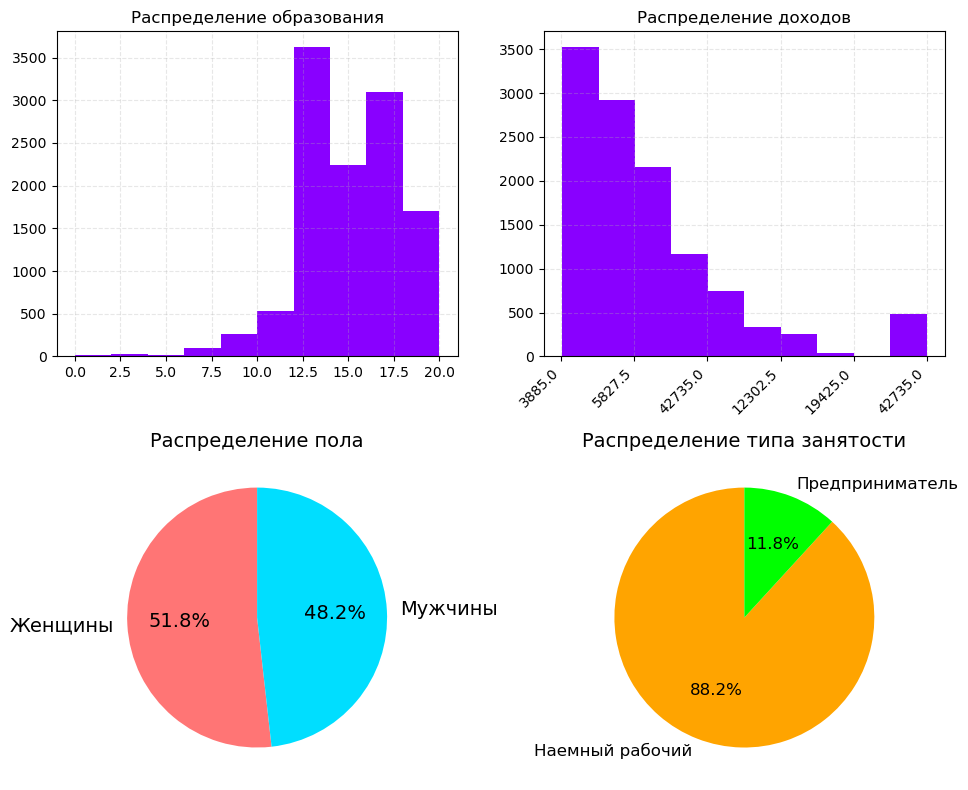

In [5]:
print(df.describe())

plt.figure(figsize=(14, 6))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].hist(df['educ'], color = purple_grad[1])
axes[0, 0].set_title("Распределение образования")
axes[0, 0].grid(True, linestyle='--', alpha=0.3)

axes[0, 1].hist(df['realrinc'], color = purple_grad[1])
axes[0, 1].set_title("Распределение доходов")
axes[0, 1].set_xticklabels(df['realrinc'], rotation=45, ha='right') 
axes[0, 1].grid(True, linestyle='--', alpha=0.3)

category_counts = df['sex'].value_counts()

axes[1, 0].pie(category_counts,
        labels={"Женщины":1, "Мужчины": 0},  # Подписи секторов - названия категорий
        autopct='%1.1f%%',  # Формат процентов (один знак после запятой)
        startangle=90,  # Угол начала (90 градусов - вертикально вверх)
        colors=[red_grad[0], cyan_grad[1]],
        textprops={'fontsize': 14}) 
axes[1, 0].set_title('Распределение пола', fontsize = 14)  # Заголовок диаграммы
axes[1, 0].set_ylabel('') 

category_counts = df['wrkslf'].value_counts()

axes[1, 1].pie(category_counts,
        labels={"Наемный рабочий":1, "Предприниматель": 0},  # Подписи секторов - названия категорий
        autopct='%1.1f%%',  # Формат процентов (один знак после запятой)
        startangle=90,  # Угол начала (90 градусов - вертикально вверх)
        colors=[orange_grad[1], green_grad[1]],
        textprops={'fontsize': 12}) 
axes[1, 1].set_title('Распределение типа занятости', fontsize = 14)  # Заголовок диаграммы
axes[1, 1].set_ylabel('') 

plt.tight_layout()
plt.show()


# Корректировка данных в столбцах

In [6]:
# 1 - мужчина
# 2 - женщина
df.sex.unique()

#df['sex'] = df['sex'].replace({1: 0, 2: 1})
df['sex'] = (df['sex'] == 2).astype(int)
df.head()



,educ,realrinc,wrkslf,sex,year
0,16.0,42735.0,2.0,0,2010
1,16.0,3885.0,2.0,1,2010
5,6.0,5827.5,2.0,0,2010
6,16.0,42735.0,2.0,1,2010
10,14.0,12302.5,2.0,1,2010


In [7]:
df.head(20)

,educ,realrinc,wrkslf,sex,year
0,16.0,42735.0,2.0,0,2010
1,16.0,3885.0,2.0,1,2010
5,6.0,5827.5,2.0,0,2010
6,16.0,42735.0,2.0,1,2010
10,14.0,12302.5,2.0,1,2010
12,12.0,19425.0,2.0,0,2010
19,16.0,42735.0,2.0,0,2010
20,12.0,28490.0,2.0,0,2010
21,13.0,28490.0,2.0,0,2010
24,17.0,34965.0,2.0,1,2010


In [8]:
# 1 - предприниматель
# 2 - наемн раб
print(df['wrkslf'].unique())
df['wrkslf'] = (df['wrkslf'] == 2).astype(int)
df['educ'] = df['educ'].astype(int)
df.head(20)


[2. 1.]


,educ,realrinc,wrkslf,sex,year
0,16,42735.0,1,0,2010
1,16,3885.0,1,1,2010
5,6,5827.5,1,0,2010
6,16,42735.0,1,1,2010
10,14,12302.5,1,1,2010
12,12,19425.0,1,0,2010
19,16,42735.0,1,0,2010
20,12,28490.0,1,0,2010
21,13,28490.0,1,0,2010
24,17,34965.0,1,1,2010


# Описательная статистика

In [9]:
# Рассмотрим основные метрики дохода
print("Численные:")
print(df[['realrinc']].describe().round(3))

# Статистика для факторных переменных
print("\nФакторные:")
print(df[['wrkslf', 'sex', 'educ']].astype('category').describe())

# Статистика по полу 0 - женщина, 1 - мужчина
print("\nГруппировка по полу:")
print(df.groupby('sex')[['realrinc', 'educ']].agg(['mean', 'median', 'std', 'count']).round(3))

# Корреляция
print("\nКорреляция образование-доход для мужчин:", 
      df[df['sex'] == 0][['educ', 'realrinc']].corr().iloc[0,1].round(3))

print("Корреляция образование-доход для женщин:", 
      df[df['sex'] == 1][['educ', 'realrinc']].corr().iloc[0,1].round(3))

# Статистика по типу занятости 0 - предприним, 1 - наемн раб
print("\nГруппировка по типу занятости:")
print(df.groupby('wrkslf')[['realrinc', 'educ']].agg(['mean', 'median', 'std', 'count']).round(3))

# Корреляция
print("\nКорреляция образование-доход для предпринимателей:", 
      df[df['wrkslf'] == 0][['educ', 'realrinc']].corr().iloc[0,1].round(3))

print("Корреляция образование-доход для наемных рабочих:", 
      df[df['wrkslf'] == 1][['educ', 'realrinc']].corr().iloc[0,1].round(3))

print("Процентное соотношение мужчин к женщинам:")
print((df['sex'].value_counts(normalize=True) * 100).round(3))
print("Процентное соотношение предпринимателей к наемным рабочим:")
print((df['wrkslf'].value_counts(normalize=True) * 100).round(3))
print("Процентное соотношение предпринимателей к наемным рабочим с разделением по полу:")
print((df.groupby('sex')['wrkslf'].value_counts(normalize=True) * 100).round(3))

Численные:
         realrinc
count   11623.000
mean    23527.375
std     22102.487
min       204.500
25%      8512.500
50%     17550.000
75%     31590.000
max    100000.000

Факторные:
        wrkslf    sex   educ
count    11623  11623  11623
unique       2      2     21
top          1      1     12
freq     10251   6018   2731

Группировка по полу:
      realrinc                              educ                    
          mean   median        std count    mean median    std count
sex                                                                 
0    28305.759  22050.0  24752.331  5605  14.274   14.0  2.995  5605
1    19076.920  14245.0  18217.734  6018  14.509   14.0  2.778  6018

Корреляция образование-доход для мужчин: 0.367
Корреляция образование-доход для женщин: 0.398

Группировка по типу занятости:
         realrinc                               educ                     
             mean   median        std  count    mean median    std  count
wrkslf                      

# Базовый график -  Зависимость дохода от количества лет образования

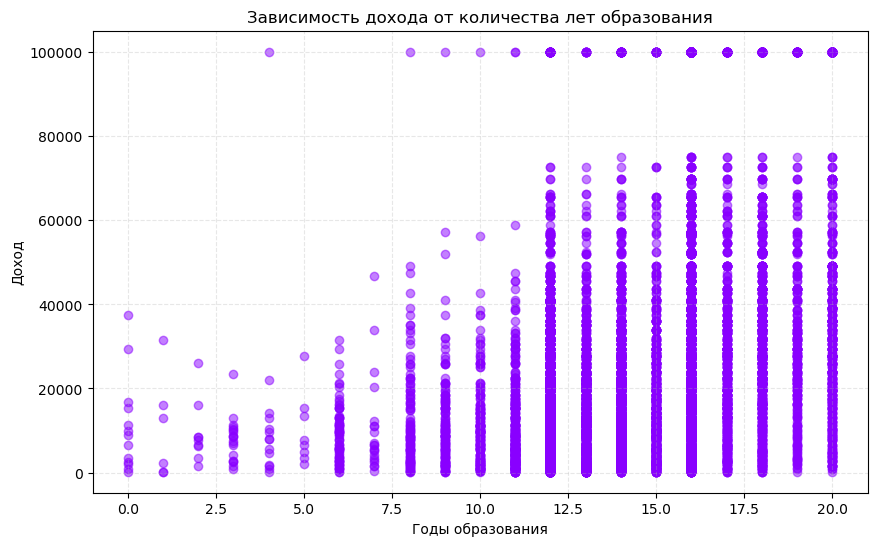

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['educ'], df['realrinc'], alpha=0.5, color = purple_grad[1])  # alpha для прозрачности
plt.title('Зависимость дохода от количества лет образования')
plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Исходя из данного графика можно увидеть явную зависимость дохода от количества лет образования.  
Графикм можно разделить на 2 части, где люди с количеством лет образования от 0 до 10 чаще зарабатывают меньше, чем люди с кол-вом лет образования >10. Также во 2 части можно выделить две группы выбросов - 
зарабатывающие много и зарабатывающие очень много.

# Рассмотрим выбросы в доходе

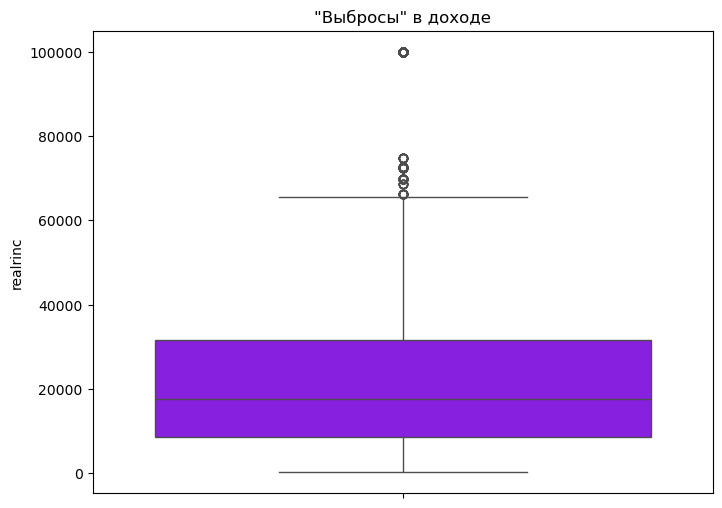

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['realrinc'], color = purple_grad[1])
plt.title('"Выбросы" в доходе')
plt.show()
# Данные выбросы не стоит удалять поскольку они просто зарабатывают больше обычного

# Средний доход в зависимости от кол-ва лет образования

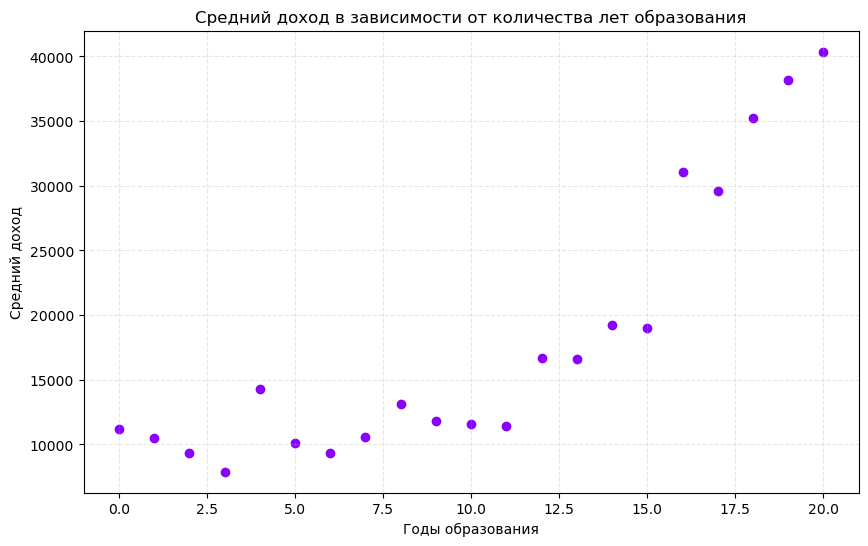

In [12]:
grouped_income = df.groupby('educ')['realrinc'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(grouped_income.index, grouped_income.values, color = purple_grad[1])
plt.title('Средний доход в зависимости от количества лет образования')
plt.xlabel('Годы образования')
plt.ylabel('Средний доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Распределение дохода

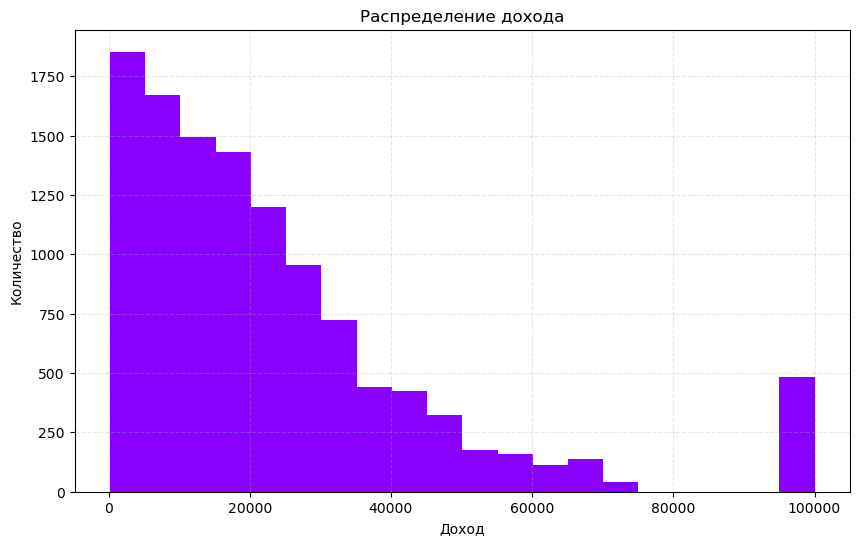

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['realrinc'], bins=20, color = purple_grad[1])  # bins - количество столбцов
plt.title('Распределение дохода')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Зависимость дохода от образования с учетом пола

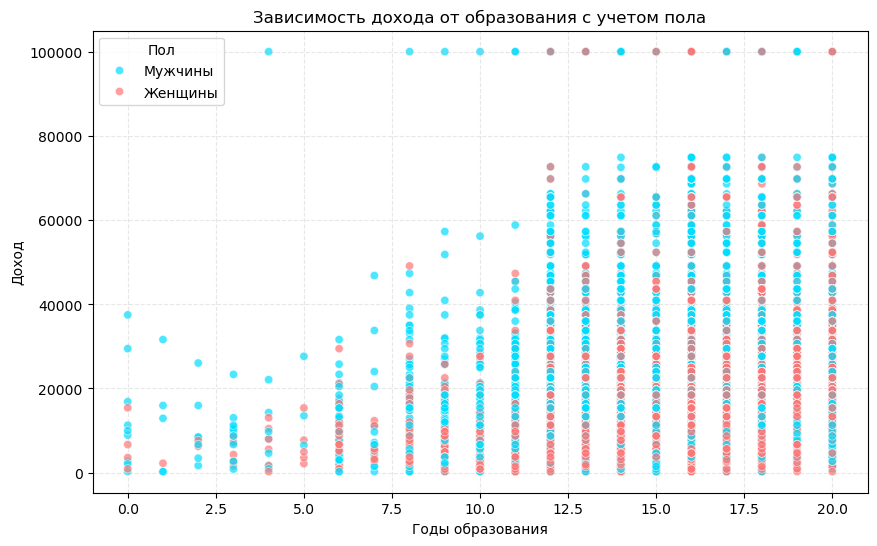

In [14]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x='educ', 
    y='realrinc', 
    hue='sex', 
    data=df, 
    alpha=0.7,
    palette={0: cyan_grad[1], 1: red_grad[0]},
)
plt.title('Зависимость дохода от образования с учетом пола')
plt.xlabel('Годы образования')
plt.ylabel('Доход')

handles, _ = scatter.get_legend_handles_labels()
new_labels = ['Мужчины', 'Женщины']
plt.legend(handles=handles, labels=new_labels, title='Пол')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [15]:
df[df['sex'] == 1]['realrinc'].max()

100000.0

Исходя из данного графика и учитывая ранее проведенную описательную статистику можно сказать, что нет существенной разницы во влиянии количества лет образования на доход мужчин и женщин, однако нельзя не заметить, что из всех самых больших выбросов только один соответстует женщине.

# График зависимости дохода от образования с учетом типа занятости

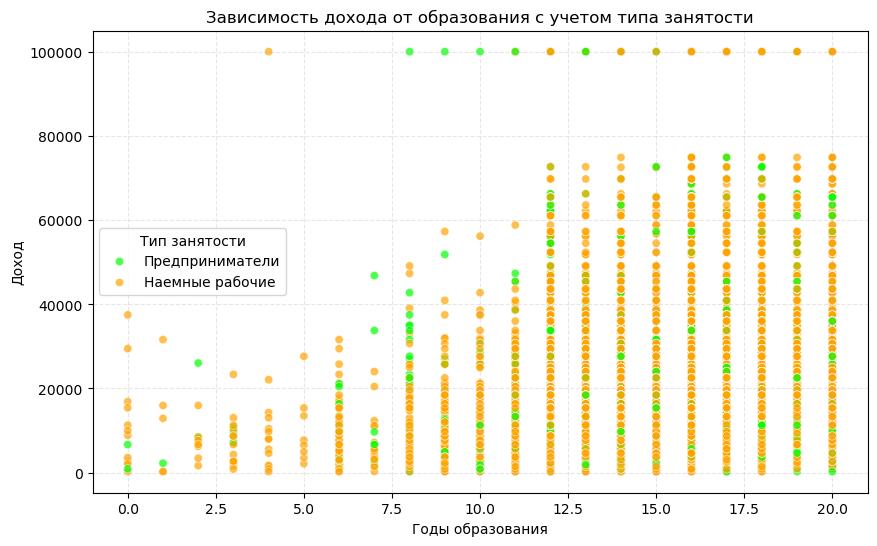

In [16]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x='educ', 
    y='realrinc', 
    hue='wrkslf', 
    data=df, 
    alpha=0.7,
    palette={0: green_grad[1], 1: orange_grad[1]},
)
plt.title('Зависимость дохода от образования с учетом типа занятости')
plt.xlabel('Годы образования')
plt.ylabel('Доход')

handles, _ = scatter.get_legend_handles_labels()
new_labels = ['Предприниматели', 'Наемные рабочие']
plt.legend(handles=handles, labels=new_labels, title='Тип занятости')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Исходя из данного графика и учитывая ранее проведенную описательную статистику можно сказать, что нет существенной разницы во влиянии количества лет образования на доход предпринимателей и наемных рабочих, оба типа занятости могут зарабатывать большое количество денег с учетом большого количества лет образования.

# Распределение дохода по каждому году образования

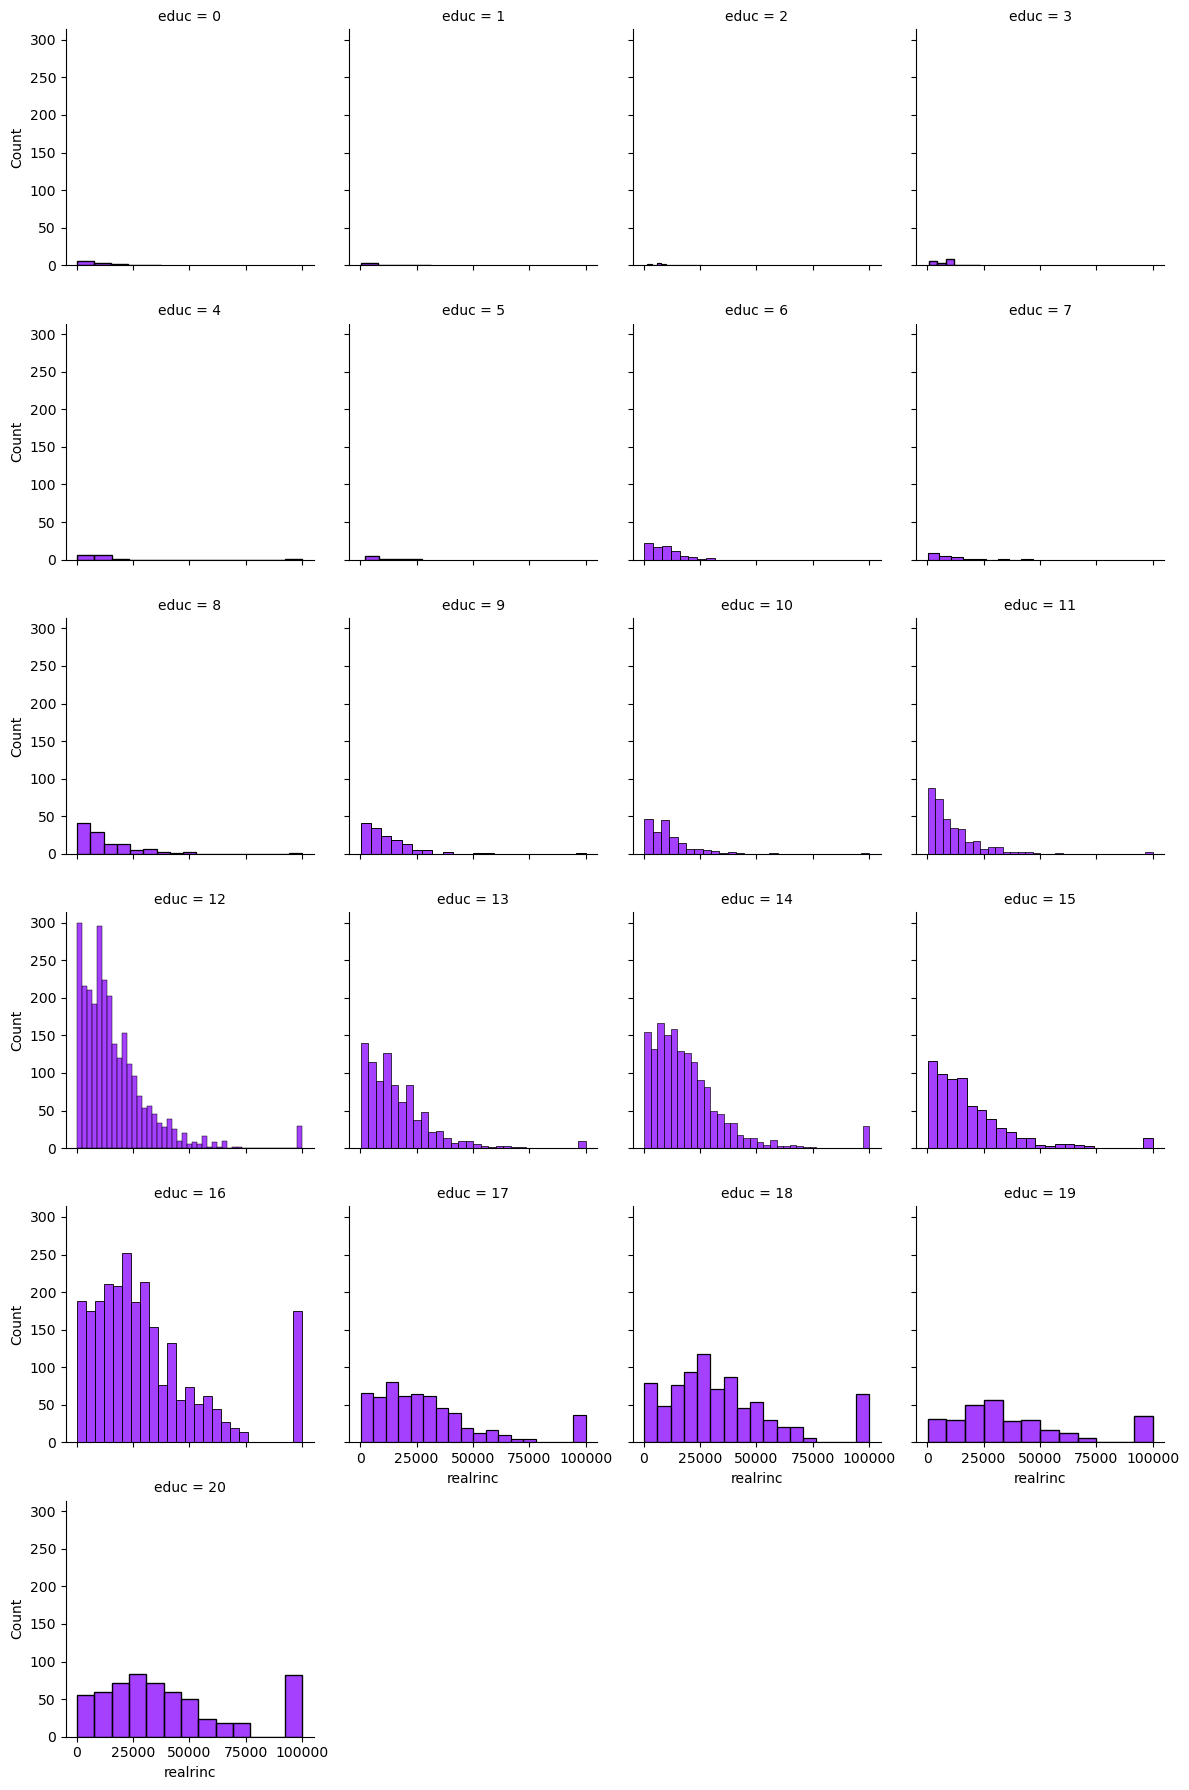

In [17]:
sns.FacetGrid(df, col="educ", col_wrap=4).map(sns.histplot, "realrinc", color = purple_grad[1])
plt.show()

# Матрица корреляции

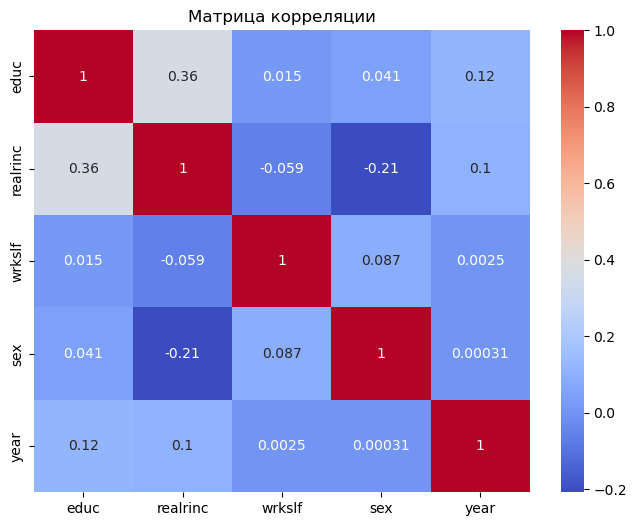

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Матрица корреляции')
plt.show()

ПОдтверждается, что между образованием  доходом есть связь, хоть корреляционная карта показывает, что эта связь слабая

# Распределение дохода по полу с плотностью распределения

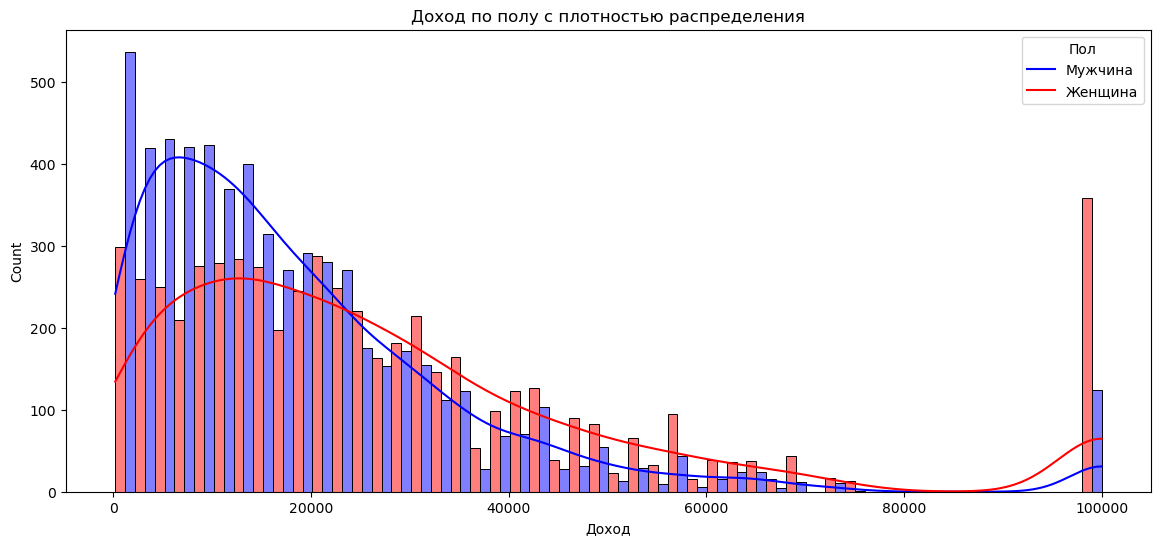

In [19]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='realrinc', hue='sex', 
             multiple='dodge', kde=True, 
             palette={0:'red', 1:'blue'}, bins=50)
plt.title("Доход по полу с плотностью распределения")
plt.xlabel("Доход")
plt.legend(title="Пол", labels=["Мужчина", "Женщина"])
plt.show()

# Аналитика

Построим модель линейной регрессии.  
В качестве целевой переменной возьмём доход.  
В качестве признака возьмём количество лет образования.

In [20]:
X = df['educ'].values.reshape(-1, 1)  # Делаем из Series двумерный массив
y = df['realrinc'].values

In [21]:
import statsmodels.api as sm

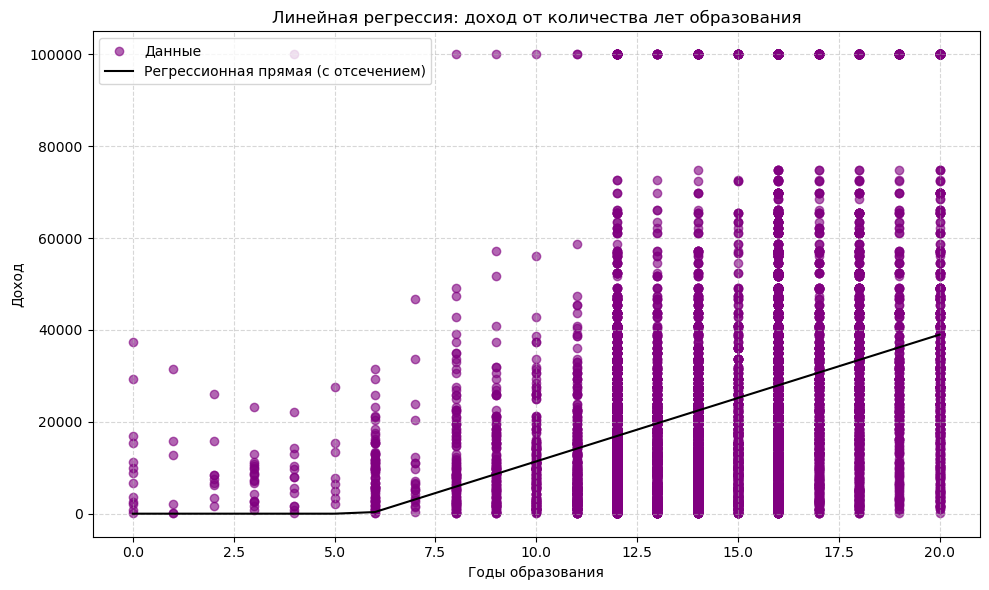

In [22]:
# Добавляем константу
X_sm = sm.add_constant(X)

model_simple = sm.OLS(y, X_sm).fit()

intercept, slope = model_simple.params

if slope != 0:
    x0 = -intercept / slope
else:
    x0 = None

y_pred = model_simple.predict(X_sm)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', alpha=0.6, label='Данные')

X_sorted = np.sort(X.flatten())

y_pred_piecewise = np.where(X_sorted < x0, 0, intercept + slope * X_sorted)

plt.plot(X_sorted, y_pred_piecewise, color='black', label='Регрессионная прямая (с отсечением)')

plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.title('Линейная регрессия: доход от количества лет образования')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Как видим, график линейной регрессии показывает, что чем выше количество лет образования, тем выше доход.  
Рассмотрим характеристики модели.

In [23]:
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1736.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:48:34   Log-Likelihood:            -1.3195e+05
No. Observations:               11623   AIC:                         2.639e+05
Df Residuals:                   11621   BIC:                         2.639e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.621e+04    972.625    -16.663      0.0

Как видим p-value очень мальнькое для коэффициента при количестве лет образования и для свободного члена, что говорит о том, что оба значения статистически значимо влияют на целевую переменную.

Построим расширенную модель, добавим в качестве признака пол.

In [24]:
X = df[['educ', 'sex']]
y = df['realrinc']

In [25]:
X_sm = sm.add_constant(X)

model_extended = sm.OLS(y, X_sm).fit()

print(model_extended.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     1275.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:48:34   Log-Likelihood:            -1.3161e+05
No. Observations:               11623   AIC:                         2.632e+05
Df Residuals:                   11620   BIC:                         2.632e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.209e+04    956.903    -12.634      0.0

Построим два графика, отдельно для мужчин и отдельно для женщин.

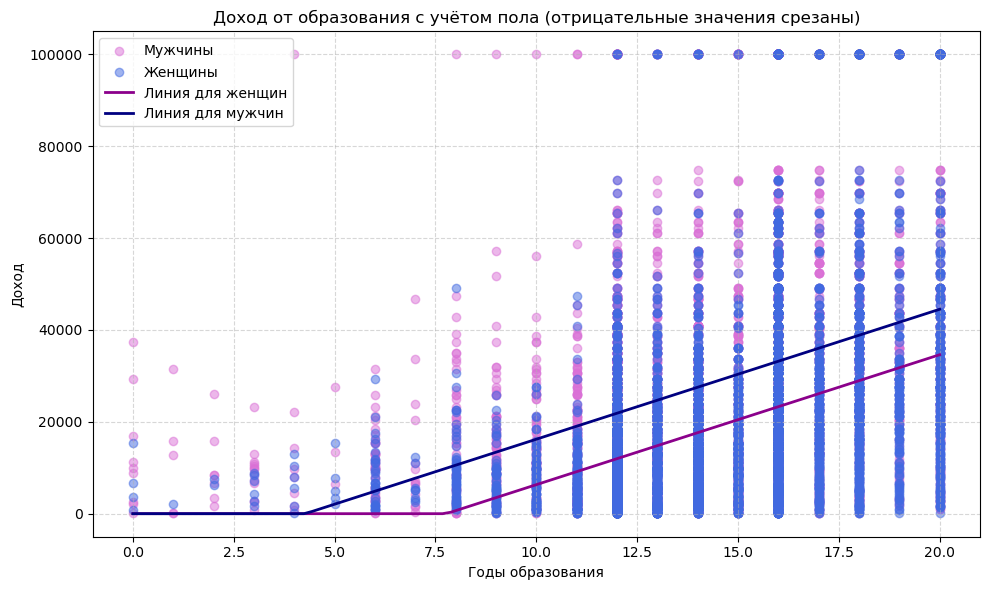

In [26]:
intercept, b_educ, b_sex = model_extended.params
educ_range = np.linspace(df['educ'].min(), df['educ'].max(), 100)

y_men = intercept + b_educ * educ_range
y_women = intercept + b_educ * educ_range + b_sex

y_men = np.where(y_men < 0, 0, y_men)
y_women = np.where(y_women < 0, 0, y_women)

plt.figure(figsize=(10, 6))

plt.scatter(df[df['sex'] == 0]['educ'], df[df['sex'] == 0]['realrinc'], 
            color='orchid', alpha=0.5, label='Мужчины')
plt.scatter(df[df['sex'] == 1]['educ'], df[df['sex'] == 1]['realrinc'], 
            color='royalblue', alpha=0.5, label='Женщины')

plt.plot(educ_range, y_women, color='darkmagenta', linewidth=2, label='Линия для женщин')
plt.plot(educ_range, y_men, color='navy', linewidth=2, label='Линия для мужчин')

plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.title('Доход от образования с учётом пола (отрицательные значения срезаны)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Сравним качество двух моделей.

In [27]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_simple, model_extended)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,11621.0,4.939665e+12,0.0,NaN,NaN,NaN
1,11620.0,4.655899e+12,1.0,2.837659e+11,708.211034,1.611910e-151


Как видим, p-value очень маленькое, что говорит о том, что расширенная модель лучше упрощённой.

Как мы можем видеть по графику уровень дохода у мужчин выше, чем уровень дохода у женщин в зависимости от колчисества лет образования.

Построим отдельно регрессию для мужчин и отдельно для женщин и отобразим их на одном графике

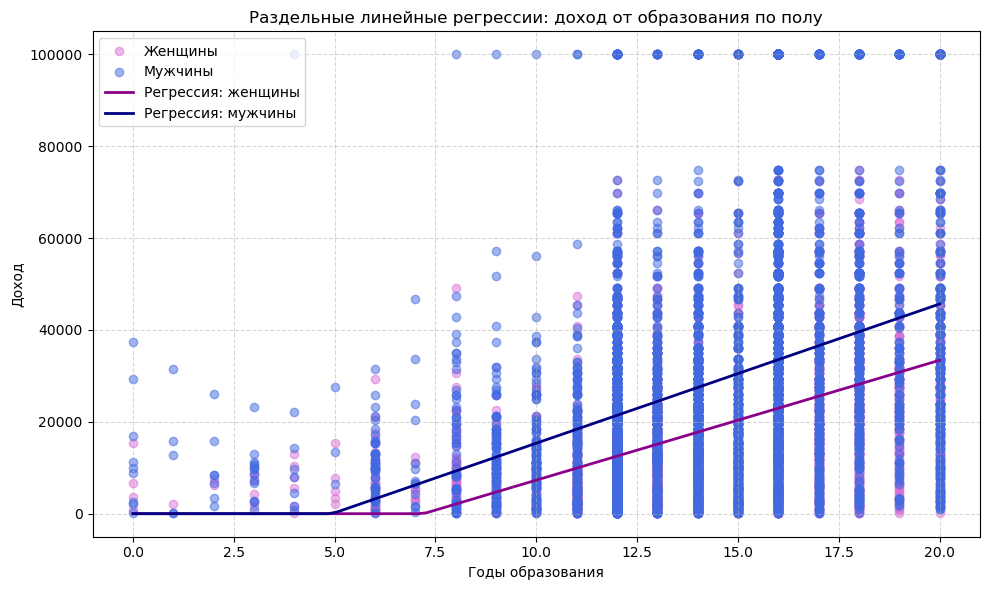

In [28]:
df_men = df[df['sex'] == 0]
df_women = df[df['sex'] == 1]

X_women = sm.add_constant(df_women['educ'])
y_women = df_women['realrinc']
model_women = sm.OLS(y_women, X_women).fit()

X_men = sm.add_constant(df_men['educ'])
y_men = df_men['realrinc']
model_men = sm.OLS(y_men, X_men).fit()

educ_range = np.linspace(df['educ'].min(), df['educ'].max(), 100)
X_range = sm.add_constant(educ_range)

y_pred_women = model_women.predict(X_range)
y_pred_men = model_men.predict(X_range)

y_pred_men = np.where(y_pred_men < 0, 0, y_pred_men)
y_pred_women = np.where(y_pred_women < 0, 0, y_pred_women)

plt.figure(figsize=(10, 6))

plt.scatter(df_women['educ'], df_women['realrinc'], 
            color='orchid', alpha=0.5, label='Женщины')
plt.scatter(df_men['educ'], df_men['realrinc'], 
            color='royalblue', alpha=0.5, label='Мужчины')

plt.plot(educ_range, y_pred_women, color='darkmagenta', linewidth=2, label='Регрессия: женщины')
plt.plot(educ_range, y_pred_men, color='navy', linewidth=2, label='Регрессия: мужчины')

plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.title('Раздельные линейные регрессии: доход от образования по полу')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Как видим, количество лет образования сильнее влияет на доход мужчин, чем на доход женщин.

Теперь построим расширенную модель, но в качестве признака возьмём тип занятости

In [29]:
X = df[['educ', 'wrkslf']]
y = df['realrinc']

In [30]:
X_sm = sm.add_constant(X)

model_extended2 = sm.OLS(y, X_sm).fit()

print(model_extended2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     899.8
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:48:36   Log-Likelihood:            -1.3193e+05
No. Observations:               11623   AIC:                         2.639e+05
Df Residuals:                   11620   BIC:                         2.639e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.243e+04   1094.856    -11.353      0.0

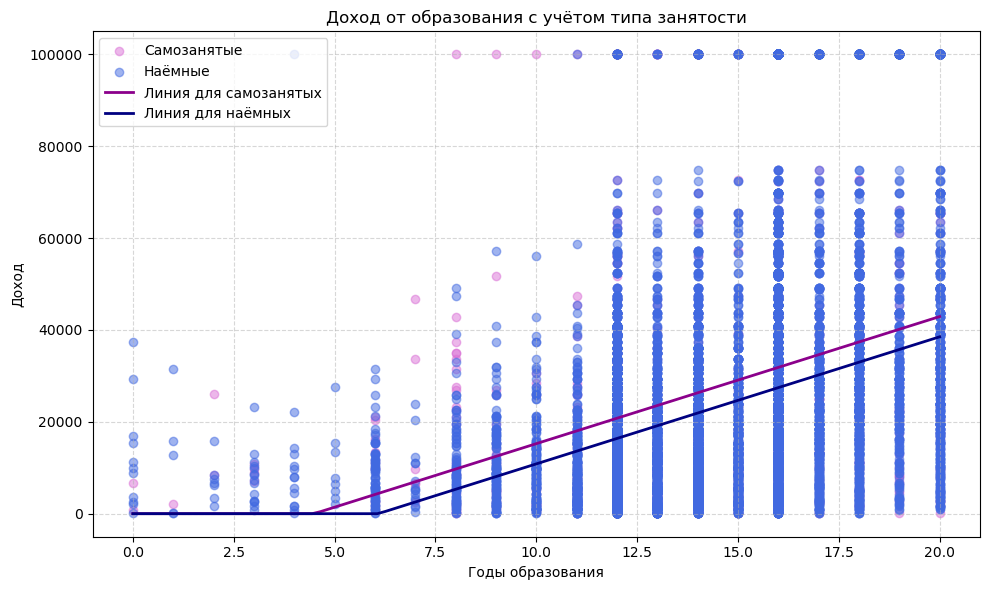

In [31]:
intercept, b_educ, b_wrkslf = model_extended2.params

educ_range = np.linspace(df['educ'].min(), df['educ'].max(), 100)

y_entrep = intercept + b_educ * educ_range          
y_hired = intercept + b_educ * educ_range + b_wrkslf

y_entrep = np.where(y_entrep < 0, 0, y_entrep)
y_hired = np.where(y_hired < 0, 0, y_hired)

plt.figure(figsize=(10, 6))

plt.scatter(df[df['wrkslf'] == 0]['educ'], df[df['wrkslf'] == 0]['realrinc'], 
            color='orchid', alpha=0.5, label='Самозанятые')
plt.scatter(df[df['wrkslf'] == 1]['educ'], df[df['wrkslf'] == 1]['realrinc'], 
            color='royalblue', alpha=0.5, label='Наёмные')

plt.plot(educ_range, y_entrep, color='darkmagenta', linewidth=2, label='Линия для самозанятых')
plt.plot(educ_range, y_hired, color='navy', linewidth=2, label='Линия для наёмных')

plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.title('Доход от образования с учётом типа занятости')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Как видим, разница в уровне дохода в зависимости от количества лет образования при разделении по типу занятости ещё меньше, чем при разделении по полу.

Построим две модели регресси для каждого типа занятости.

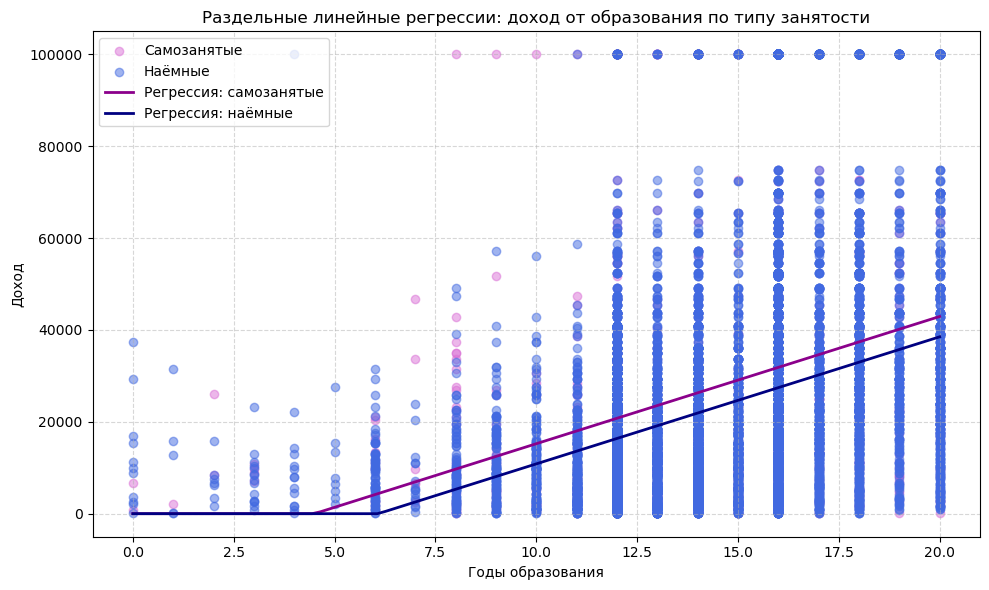

In [32]:
df_entrep = df[df['wrkslf'] == 0]
df_hired = df[df['wrkslf'] == 1]

X_entrep = sm.add_constant(df_entrep['educ'])
y_entrep = df_entrep['realrinc']
model_entrep = sm.OLS(y_entrep, X_entrep).fit()

X_hired = sm.add_constant(df_hired['educ'])
y_hired = df_hired['realrinc']
model_hired = sm.OLS(y_hired, X_hired).fit()

educ_range = np.linspace(df['educ'].min(), df['educ'].max(), 100)
X_range = sm.add_constant(educ_range)

y_pred_entrep = model_entrep.predict(X_range)
y_pred_hired = model_hired.predict(X_range)

y_pred_entrep = np.where(y_pred_entrep < 0, 0, y_pred_entrep)
y_pred_hired = np.where(y_pred_hired < 0, 0, y_pred_hired)

plt.figure(figsize=(10, 6))

plt.scatter(df_entrep['educ'], df_entrep['realrinc'], 
            color='orchid', alpha=0.5, label='Самозанятые')
plt.scatter(df_hired['educ'], df_hired['realrinc'], 
            color='royalblue', alpha=0.5, label='Наёмные')

plt.plot(educ_range, y_pred_entrep, color='darkmagenta', linewidth=2, label='Регрессия: самозанятые')
plt.plot(educ_range, y_pred_hired, color='navy', linewidth=2, label='Регрессия: наёмные')

plt.xlabel('Годы образования')
plt.ylabel('Доход')
plt.title('Раздельные линейные регрессии: доход от образования по типу занятости')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Как видим по графикам, влияние количества лет образования на уровень дохода у самозанятых немного выше, чем у наёмных рабочих

Построим модель с учётом всех рассматриваемых признаков.

In [33]:
X = df[['educ', 'sex', 'wrkslf']]
y = df['realrinc']

In [34]:
X_sm = sm.add_constant(X)

model_extended3 = sm.OLS(y, X_sm).fit()

print(model_extended3.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     861.6
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:48:38   Log-Likelihood:            -1.3159e+05
No. Observations:               11623   AIC:                         2.632e+05
Df Residuals:                   11619   BIC:                         2.632e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9502.8571   1070.103     -8.880      0.0

Сравним прошлую расширенную модель, в которой добавлен пол, с ещё более расширенной моделью - добавление типа занятости.

In [35]:
anova_lm( model_extended,  model_extended3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,11620.0,4.655899e+12,0.0,NaN,NaN,NaN
1,11619.0,4.644354e+12,1.0,1.154495e+10,28.88254,7.838941e-08


Как видим p-value очень маленькое, что говорит о том, что расширенная модель гораздо лучше описывает данные чем предыдущие модели

# Выводы

Исходя из проведённого анализа мы можем сделать следующие выводы:  
- Количество лет образования очень сильно влияет на уровень дохода.
- Увеличение заработка с увеличением количества лет образования у мужчин выше чем у женщин, но разница небольшая.
- Разница в заработке самозанятых и наёмных рабочих в зависимости от количества лет образования несущественная.